<a href="https://colab.research.google.com/github/Priyam2xx3/OIBSIP_IRIS/blob/main/Oasis_iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

In [13]:
data = pd.read_csv("Iris.csv")

In [14]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [16]:
data = data.drop('Id',axis=1)

In [17]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

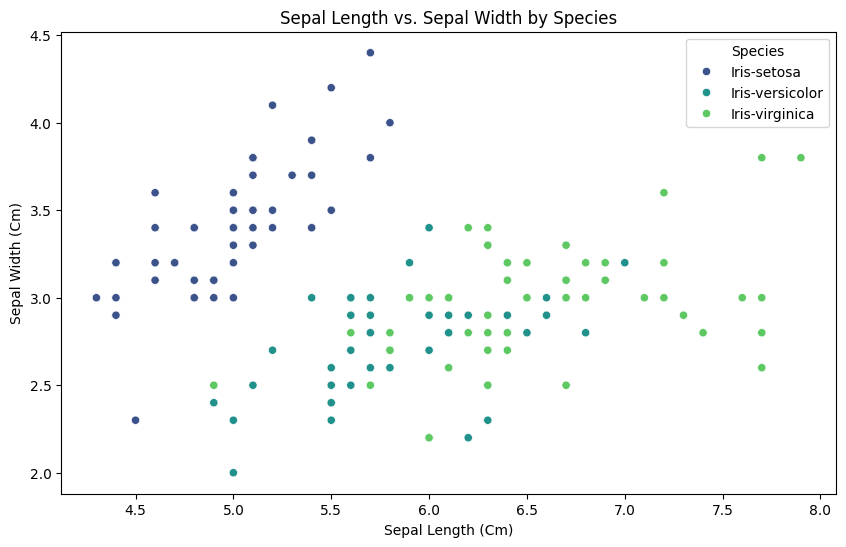

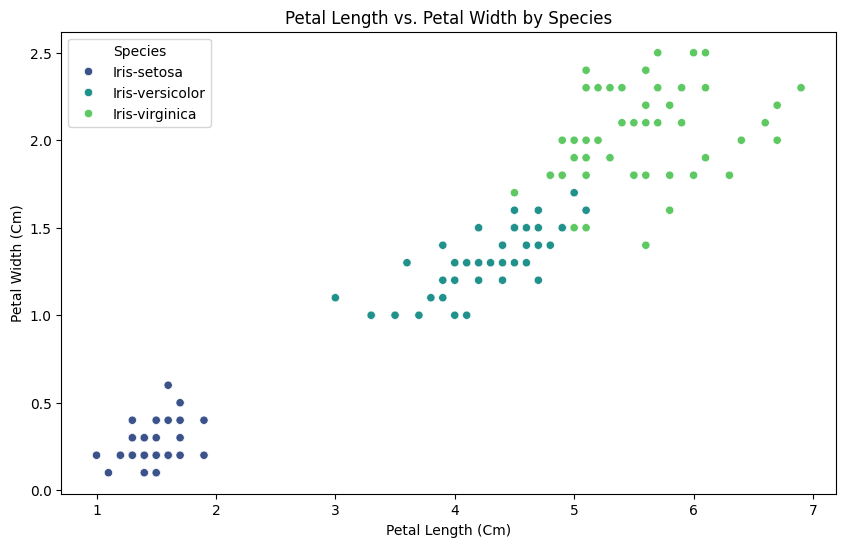

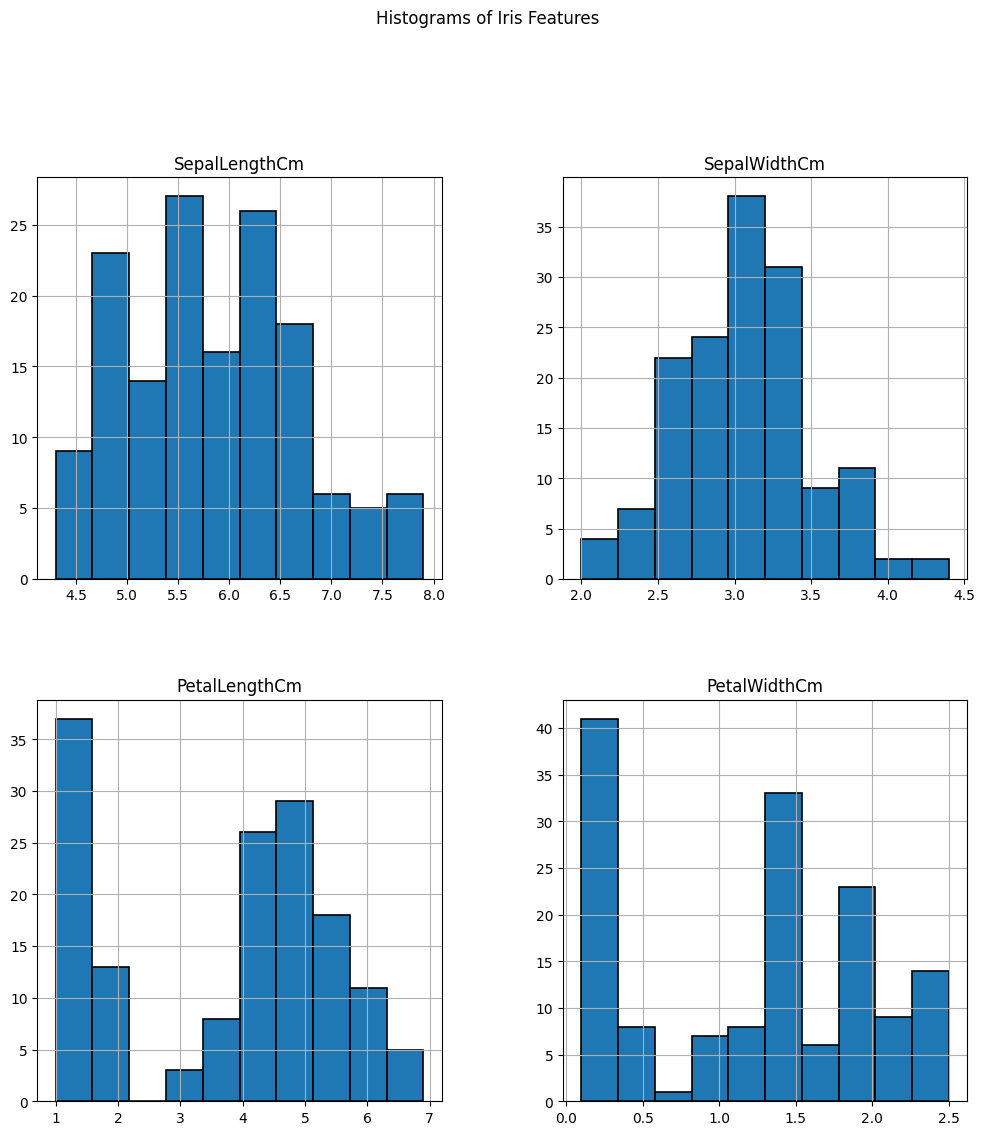

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of sepal dimensions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data, palette='viridis')
plt.title('Sepal Length vs. Sepal Width by Species')
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Sepal Width (Cm)')
plt.show()

# Scatter plot of petal dimensions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data, palette='viridis')
plt.title('Petal Length vs. Petal Width by Species')
plt.xlabel('Petal Length (Cm)')
plt.ylabel('Petal Width (Cm)')
plt.show()

# Histograms of each feature
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.suptitle('Histograms of Iris Features', y=1.02)
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['Species'] = label.fit_transform(data['Species'])
data['Species']

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [21]:
from sklearn.model_selection import train_test_split

X = data.drop("Species",axis=1)
Y = data["Species"]

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (120, 4)
Testing set: (30, 4)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)


KNeighborsClassifier()

In [23]:
from sklearn.metrics import accuracy_score,classification_report

Y_pred = model.predict(X_test)
Accuracy = accuracy_score(Y_test, Y_pred)
Classification_Report = classification_report(Y_test, Y_pred)

print(Accuracy)
print(Classification_Report)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##  Predicting

In [28]:

new_flower = pd.DataFrame([[5.1,3.5	,1.4	,0.2]], columns=X.columns)

pred = model.predict(new_flower)
species_name = label.inverse_transform(pred)

print("Predicted species:", species_name[0])

Predicted species: Iris-setosa
